1. Import Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv',encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


2. Clearning


In [ ]:
df = df[['eventid','iyear','imonth','country_txt','region_txt','city','location','summary','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt']]
df = df[(df['iyear'] >= 2013) & (df['iyear'] <=2017)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68391 entries, 113299 to 181690
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eventid           68391 non-null  int64 
 1   iyear             68391 non-null  int64 
 2   imonth            68391 non-null  int64 
 3   country_txt       68391 non-null  object
 4   region_txt        68391 non-null  object
 5   city              68391 non-null  object
 6   location          30117 non-null  object
 7   summary           68391 non-null  object
 8   success           68391 non-null  int64 
 9   suicide           68391 non-null  int64 
 10  attacktype1_txt   68391 non-null  object
 11  targtype1_txt     68391 non-null  object
 12  targsubtype1_txt  63561 non-null  object
dtypes: int64(5), object(8)
memory usage: 7.3+ MB


In [ ]:
df['location'].fillna('Unknown')

113299                      Inside the Miryan Police limits
113300                                              Unknown
113301                                              Unknown
113302                                      Southern Kirkuk
113303    The incident occurred in the Orangi Town neigh...
                                ...                        
181686       The incident occurred near the town of Balcad.
181687       The incident occurred at the Humaymim Airport.
181688    The incident occurred in the Datu Hoffer distr...
181689    The incident occurred in the Mantripukhri neig...
181690                                              Unknown
Name: location, Length: 68391, dtype: object

In [ ]:
df['location'].fillna('Unknown')
df['targsubtype1_txt'].fillna('Unknown')
df['summary'].fillna('Unknown')
df.duplicated().sum()

0

In [ ]:
df.head()

,eventid,iyear,imonth,country_txt,region_txt,city,location,summary,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt
113299,201301010001,2013,1,Pakistan,South Asia,Bannu,Inside the Miryan Police limits,01/01/2013: An explosive device was discovered...,0,0,Bombing/Explosion,Police,"Police Building (headquarters, station, school)"
113300,201301010002,2013,1,Iraq,Middle East & North Africa,Tuz Khormato,NaN,01/01/2013: An explosives-laden vehicle detona...,1,0,Bombing/Explosion,Private Citizens & Property,Village/City/Town/Suburb
113301,201301010003,2013,1,Iraq,Middle East & North Africa,Tuz Khormato,NaN,01/01/2013: At least two explosives detonated ...,1,0,Bombing/Explosion,Police,Police Security Forces/Officers
113302,201301010004,2013,1,Iraq,Middle East & North Africa,Kirkuk,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,1,0,Bombing/Explosion,Police,Police Patrol (including vehicles and convoys)
113303,201301010005,2013,1,Pakistan,South Asia,Karachi,The incident occurred in the Orangi Town neigh...,01/01/2013: An explosive device was discovered...,0,0,Bombing/Explosion,Private Citizens & Property,Political Party Member/Rally


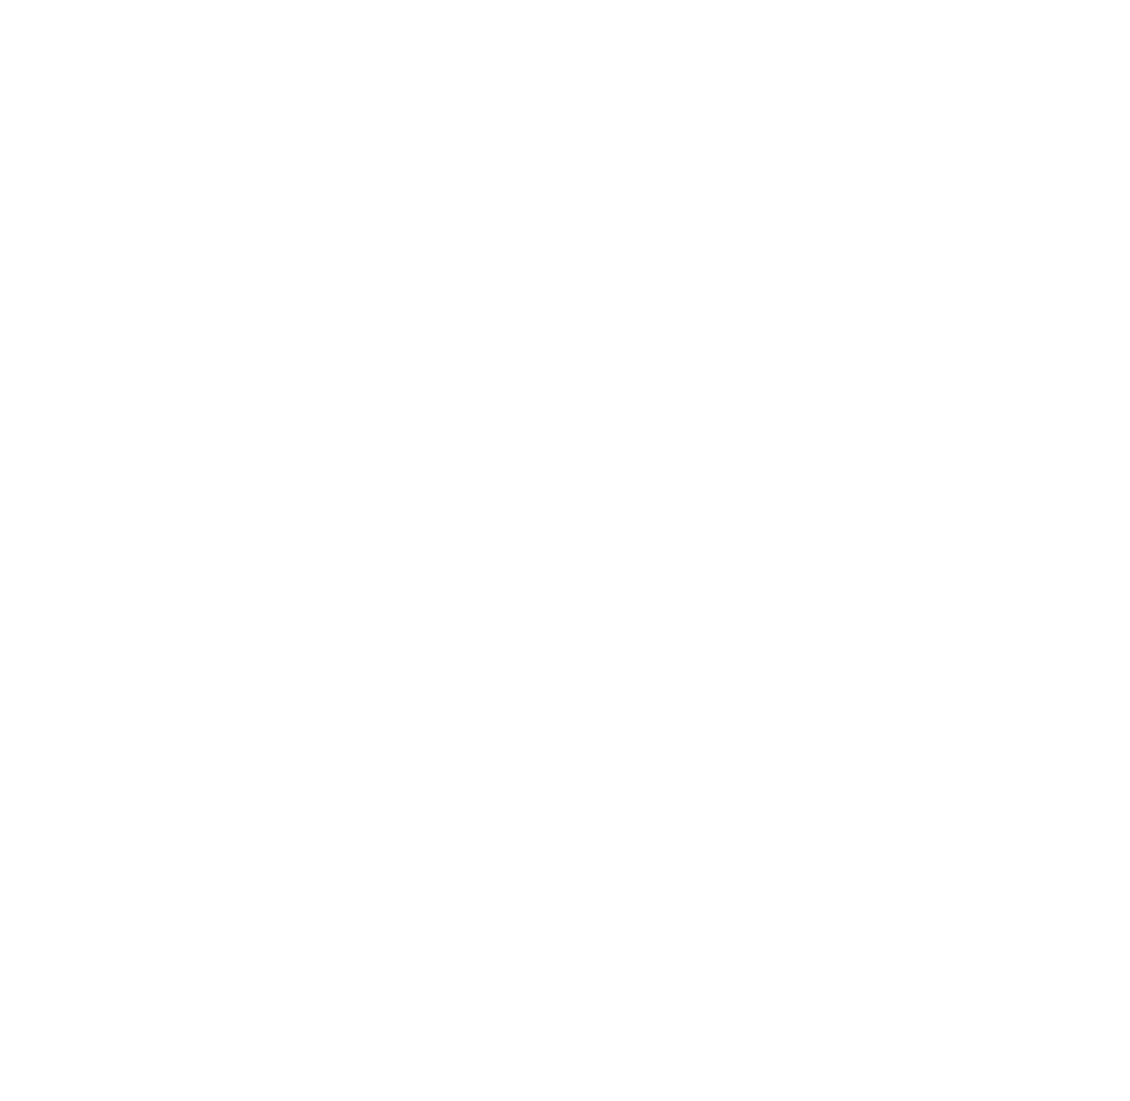

In [ ]:
stopwords = set(STOPWORDS)
def mywordcloud(data, title =None):
  wordcloud = WordCloud(
      background_color = 'white',
      stopwords=stopwords,
      max_words = 200,
      max_font_size = 40,
      scale=3,
      random_state=1
  ).generate(str(data))
  fig = plt.figure(1, figsize=(20,20))
  plt.axis('off')
  if title:
    fig.suptitle(title, frontsize = 20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
  wordcloud.to_file('word_cloud.png')
mywordcloud(df['summary'].head(100))

# New Section

In [ ]:
df['region_txt'].unique()

array(['South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa',
       'Southeast Asia', 'Eastern Europe', 'South America',
       'Western Europe', 'North America', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'Australasia & Oceania'], dtype=object)

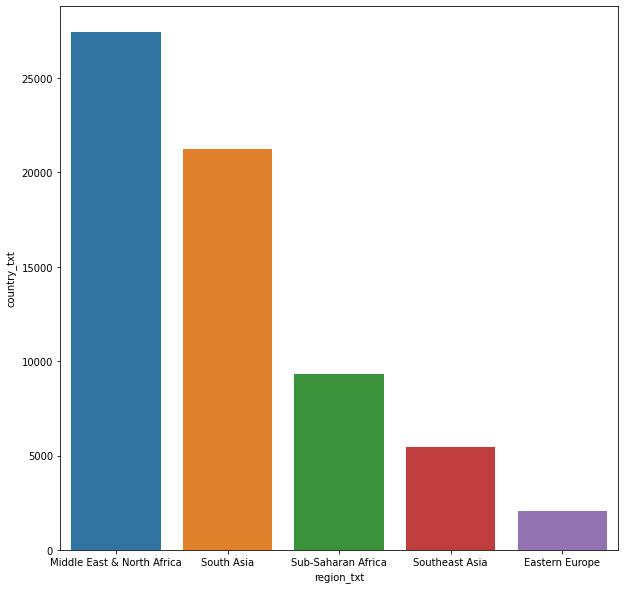

In [ ]:
# I. Top các vùng bị khủng bố nhiều nhất (từ năm 2013 đến 2017)
region_to_conntry = df.groupby('region_txt').count()['country_txt'].reset_index()
region_to_conntry = region_to_conntry.sort_values('country_txt', ascending=False).head(5)
plt.figure(figsize=(10,10))
sns.barplot(data=region_to_conntry, x='region_txt', y= 'country_txt')
plt.show()

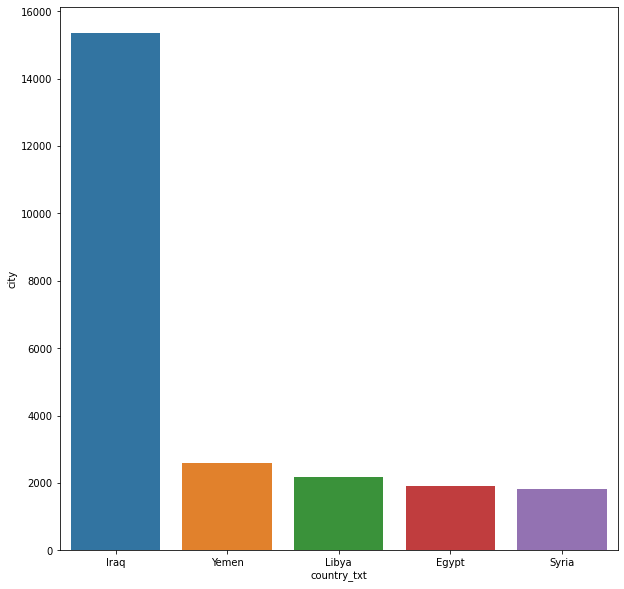

In [ ]:
# 1. Top các thành phố ở vùng Trung Đông và Bắc Phi bị tấn công khủng bố nhiều nhất
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
mideast_norafrica_to_city = data_mideast_norafrica.groupby('country_txt').count()['city'].reset_index()
mideast_norafrica_to_city = mideast_norafrica_to_city.sort_values('city', ascending=False).head(5)
plt.figure(figsize=(10,10))
sns.barplot(data=mideast_norafrica_to_city, x='country_txt', y= 'city')
plt.show()

In [ ]:
# Kiểm tra 
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
iraq_city.head()

,eventid,iyear,imonth,country_txt,region_txt,city,location,summary,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt
113300,201301010002,2013,1,Iraq,Middle East & North Africa,Tuz Khormato,NaN,01/01/2013: An explosives-laden vehicle detona...,1,0,Bombing/Explosion,Private Citizens & Property,Village/City/Town/Suburb
113301,201301010003,2013,1,Iraq,Middle East & North Africa,Tuz Khormato,NaN,01/01/2013: At least two explosives detonated ...,1,0,Bombing/Explosion,Police,Police Security Forces/Officers
113302,201301010004,2013,1,Iraq,Middle East & North Africa,Kirkuk,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,1,0,Bombing/Explosion,Police,Police Patrol (including vehicles and convoys)
113312,201301010015,2013,1,Iraq,Middle East & North Africa,Tikrit,NaN,01/01/2013: An explosive device detonated at t...,1,0,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)"
113313,201301010016,2013,1,Iraq,Middle East & North Africa,Tikrit,East Of Tikrit,01/01/2013: An explosive device detonated in T...,1,0,Bombing/Explosion,Police,Police Security Forces/Officers


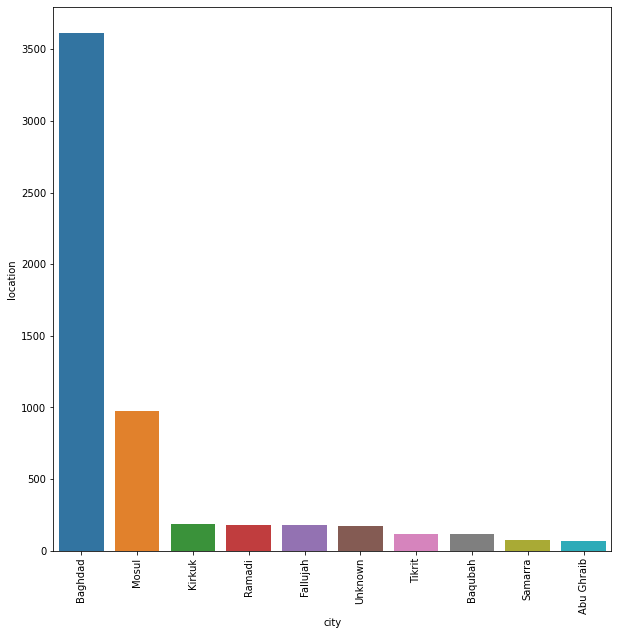

In [ ]:
# 1.1 Top các thành phố bị khủng bố nhiều ở Iraq
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
iraq_city_to_location = iraq_city.groupby('city').count()['location'].reset_index()
iraq_city_to_location = iraq_city_to_location.sort_values('location', ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(data=iraq_city_to_location, x='city', y= 'location')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

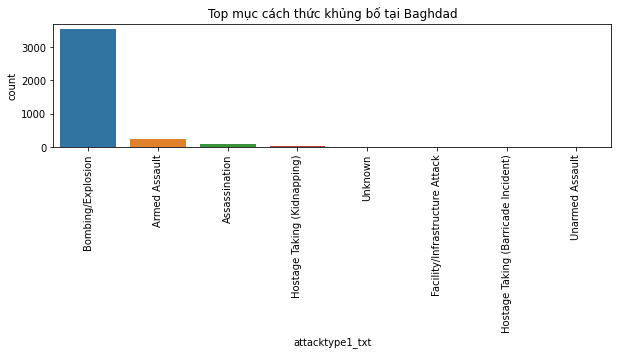

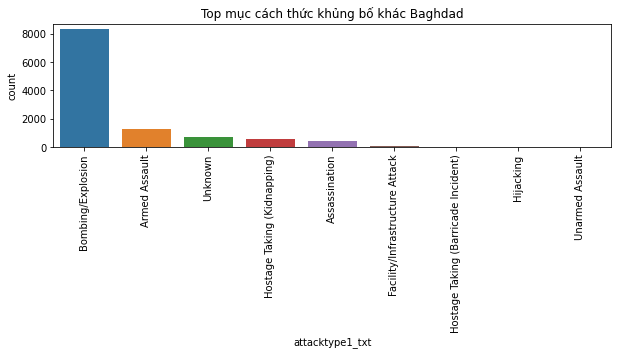

In [ ]:
# Thành phố Baghdad là thủ dô của Iraq
# 1.1.1 Top các cách thức khủng bố tại thành phố Baghdad
plt.figure(figsize=(20, 10)) # rộng - cao theo inches (max 30)
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] == 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.countplot(data=Baghdad,x='attacktype1_txt', order=Baghdad['attacktype1_txt'].value_counts().index)
plt.title('Top mục cách thức khủng bố tại Baghdad')
plt.xticks(rotation=90)
plt.show()
######################################################################################################################
# # 1.1.2 Top các cách thức khủng bố tại thành phố KHÁC Baghdad
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] != 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
plt.subplot(212)
sns.countplot(data=Baghdad,x='attacktype1_txt', order=Baghdad['attacktype1_txt'].value_counts().index)
plt.title('Top mục cách thức khủng bố khác Baghdad')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

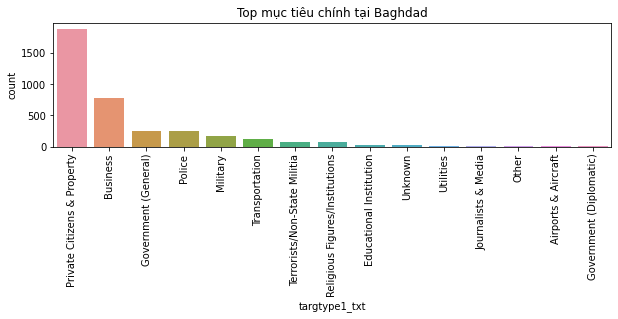

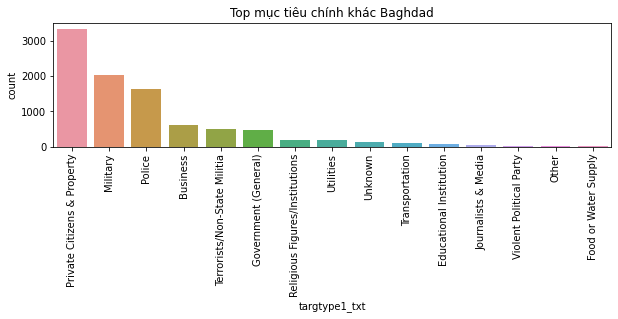

In [ ]:
plt.figure(figsize=(20, 10)) # rộng - cao theo inches (max 30)
# 1.1.3 Top các mục tiêu chính của khủng bố tại thành phố Baghdad (thành công)
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] == 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
Baghdad=Baghdad[(Baghdad['success'] == 1)]
Baghdad.groupby('targtype1_txt').count()['success'].reset_index()
plt.subplot(211)
sns.countplot(data=Baghdad,x='targtype1_txt', order=Baghdad['targtype1_txt'].value_counts().head(15).index)
plt.title('Top mục tiêu chính tại Baghdad')
plt.xticks(rotation=90)
plt.show()
#####################################################################################################################################
# 1.1.4 Top các mục tiêu chính của khủng bố ở thành phố KHÁC Baghdad (thành công)
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] != 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
Baghdad=Baghdad[(Baghdad['success'] == 1)]
Baghdad.groupby('targtype1_txt').count()['success'].reset_index()
plt.subplot(212)
sns.countplot(data=Baghdad,x='targtype1_txt', order=Baghdad['targtype1_txt'].value_counts().head(15).index)
plt.title('Top mục tiêu chính khác Baghdad')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

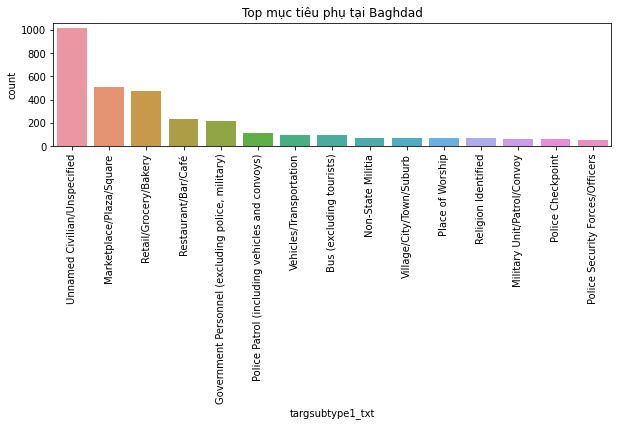

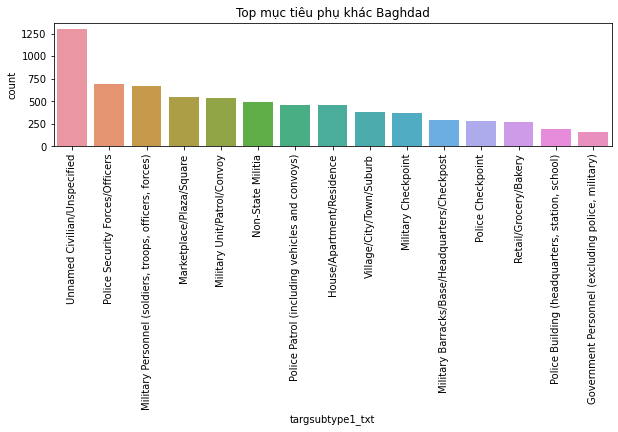

In [ ]:
plt.figure(figsize=(20, 10)) # rộng - cao theo inches (max 30)
# 1.1.5 Top các mục tiêu phụ của khủng bố tại thành phố Baghdad (thành công)
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] == 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
Baghdad=Baghdad[(Baghdad['success'] == 1)]
plt.subplot(211)
sns.countplot(data=Baghdad,x='targsubtype1_txt', order=Baghdad['targsubtype1_txt'].value_counts().head(15).index)
plt.title('Top mục tiêu phụ tại Baghdad')
plt.xticks(rotation=90)
plt.show()
################################################################################################################################
# 1.1.6 Top các mục tiêu phụ của khủng bố tại thành phố KHÁC Baghdad (thành công)
df_iraq = df.copy()
data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
Baghdad=iraq_city[(iraq_city['city'] != 'Baghdad')]
#######################################################################################################
plt.figure(figsize=(10,5))
Baghdad=Baghdad[(Baghdad['success'] == 1)]
plt.subplot(212)
sns.countplot(data=Baghdad,x='targsubtype1_txt', order=Baghdad['targsubtype1_txt'].value_counts().head(15).index)
plt.title('Top mục tiêu phụ khác Baghdad')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 1.1.7 Top các cách thức khủng bố tại Iraq
# plt.figure(figsize=(10,10))
# sns.countplot(data=iraq_city,x='attacktype1_txt', order=iraq_city['attacktype1_txt'].value_counts().index)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# 1.1.8 Top các mục tiêu chính của khủng bố tại Iraq
# plt.figure(figsize=(15,15))
# sns.countplot(data=iraq_city,x='targtype1_txt', order=iraq_city['targtype1_txt'].value_counts().head(30).index)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# # 1.1.9 Top các mục tiêu chính của khủng bố tại Iraq (thành công)
# df_iraq = df.copy()
# data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
# iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
# plt.figure(figsize=(15,15))
# iraq_city=iraq_city[(iraq_city['success'] == 1)]
# iraq_city.groupby('targtype1_txt').count()['success'].reset_index()
# sns.countplot(data=iraq_city,x='targtype1_txt', order=iraq_city['targtype1_txt'].value_counts().head(30).index)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# # 1.1.10 Top các mục tiêu phụ của khủng bố tại Iraq (thành công)
# plt.figure(figsize=(15,15))
# data_mideast_norafrica=df[(df['region_txt'] == 'Middle East & North Africa')]
# iraq_city=data_mideast_norafrica[(data_mideast_norafrica['country_txt'] == 'Iraq')]
# iraq_city=iraq_city[(iraq_city['success'] == 1)]
# sns.countplot(data=iraq_city,x='targsubtype1_txt', order=iraq_city['targsubtype1_txt'].value_counts().head(30).index)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# # 1.2 Top các thành phố ở vùng Nam Á bị tấn công khủng bố nhiều nhất
# data_south_asia=df[(df['region_txt'] == 'South Asia')]
# south_asia_to_city = data_south_asia.groupby('country_txt').count()['city'].reset_index()
# south_asia_to_city = south_asia_to_city.sort_values('city', ascending=False).head(5)
# plt.figure(figsize=(5,5))
# sns.barplot(data=south_asia_to_city, x='country_txt', y= 'city')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# # 1.3 Top các thành phố ở vùng Nam Á bị tấn công khủng bố nhiều nhất
# data_sub_africa=df[(df['region_txt'] == 'Sub-Saharan Africa')]
# sub_africa_to_city = data_sub_africa.groupby('country_txt').count()['city'].reset_index()
# sub_africa_to_city = sub_africa_to_city.sort_values('city', ascending=False).head(5)
# plt.figure(figsize=(5,5))
# sns.barplot(data=sub_africa_to_city, x='country_txt', y= 'city')
# plt.xticks(rotation=90)
# plt.show()